In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)

C:\Users\GURU\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df1 = pd.read_csv("C:/Users/GURU/Desktop/1_week/darksky_historical.csv",sep=";")
df2 = pd.read_csv("C:/Users/GURU/Desktop/1_week/brpl_data.csv",sep =';')



In [4]:
df1.shape

(69556, 30)

In [5]:
df2.head()

,date,time_slot,block,block_load
0,2011-04-01,00:00-00:15,1,945.592
1,2011-04-01,00:15-00:30,2,928.644
2,2011-04-01,00:30-00:45,3,912.076
3,2011-04-01,00:45-01:00,4,895.105
4,2011-04-01,01:00-01:15,5,879.988


In [6]:
#Merging of Datasets
df = df1.join(df2)

In [7]:
df.head()

,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,...,visibility,sunrise,sunset,icon,summary,updated_at,date,time_slot,block,block_load
0,13,2010-12-31 18:30:00,2011-01-01 00:00:00,0.30,8.44,9.68,0.95,8.95,230.0,2.51,...,0.82,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:00-00:15,1,945.592
1,13,2010-12-31 19:30:00,2011-01-01 01:00:00,0.31,7.71,8.89,1.00,8.89,240.0,2.24,...,0.48,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:15-00:30,2,928.644
2,13,2010-12-31 20:30:00,2011-01-01 02:00:00,0.31,7.71,8.89,1.00,8.89,250.0,2.24,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:30-00:45,3,912.076
3,13,2010-12-31 21:30:00,2011-01-01 03:00:00,0.10,7.76,8.90,0.95,8.20,273.0,2.18,...,0.45,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:45-01:00,4,895.105
4,13,2010-12-31 22:30:00,2011-01-01 04:00:00,0.31,8.44,10.00,1.00,10.00,270.0,3.13,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,01:00-01:15,5,879.988


In [8]:
df.isnull().sum()

plant_id                    0
datetime_utc                0
datetime_local              0
cloud_cover             16674
apparent_temperature      280
temperature               280
humidity                  289
dew_point                 289
wind_bearing            10726
wind_speed               8524
wind_chill              69556
wind_gust               63453
heat_index              69556
pressure                41682
qpf                     69556
uv_index                63444
snow                    69556
pop                     69556
fctcode                 69556
ozone                   63436
precip_accumulation     69556
precip_intensity        63436
precip_probability      63436
precip_type              4543
visibility                181
sunrise                     0
sunset                      0
icon                        0
summary                     0
updated_at                  0
date                        0
time_slot                   0
block                       0
block_load

In [9]:
df.columns

Index(['plant_id', 'datetime_utc', 'datetime_local', 'cloud_cover',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_chill', 'wind_gust', 'heat_index',
       'pressure', 'qpf', 'uv_index', 'snow', 'pop', 'fctcode', 'ozone',
       'precip_accumulation', 'precip_intensity', 'precip_probability',
       'precip_type', 'visibility', 'sunrise', 'sunset', 'icon', 'summary',
       'updated_at', 'date', 'time_slot', 'block', 'block_load'],
      dtype='object')

In [10]:
df.describe()

,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,...,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility,block,block_load
count,69556.0,52882.000000,69276.000000,69276.000000,69267.000000,69267.000000,58830.000000,61032.000000,0.0,6103.000000,...,0.0,0.0,0.0,6120.000000,0.0,6120.000000,6120.000000,69375.000000,69556.000000,69556.000000
mean,13.0,0.224153,27.218854,25.346009,0.617021,15.901521,206.465596,2.634995,NaN,4.202830,...,NaN,NaN,NaN,278.738608,NaN,0.126832,0.037995,2.605846,48.483553,1269.930737
std,0.0,0.302703,10.116229,8.341292,0.235500,6.955778,97.490120,1.465018,NaN,2.319611,...,NaN,NaN,NaN,15.042594,NaN,0.375593,0.088569,1.505760,27.710712,367.245979
min,13.0,0.000000,-2.930000,1.110000,0.060000,-7.590000,0.000000,0.000000,NaN,0.640000,...,NaN,NaN,NaN,235.900000,NaN,0.000000,0.000000,0.000000,1.000000,436.465000
25%,13.0,0.000000,18.890000,18.890000,0.430000,10.270000,110.000000,1.480000,NaN,2.460000,...,NaN,NaN,NaN,270.580000,NaN,0.000000,0.000000,1.660000,24.000000,1032.730000
50%,13.0,0.000000,28.370000,27.220000,0.630000,15.010000,250.000000,2.660000,NaN,3.680000,...,NaN,NaN,NaN,278.410000,NaN,0.000000,0.000000,2.510000,48.000000,1256.700000
75%,13.0,0.310000,35.170000,31.180000,0.810000,22.680000,289.000000,3.580000,NaN,5.410000,...,NaN,NaN,NaN,289.390000,NaN,0.027900,0.020000,3.510000,72.000000,1537.472500
max,13.0,1.000000,54.030000,46.110000,1.000000,30.000000,359.000000,36.630000,NaN,15.570000,...,NaN,NaN,NaN,344.190000,NaN,4.980900,0.710000,16.090000,96.000000,2381.540000


In [11]:
df_r=df.copy()
df_r.head()

,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,...,visibility,sunrise,sunset,icon,summary,updated_at,date,time_slot,block,block_load
0,13,2010-12-31 18:30:00,2011-01-01 00:00:00,0.30,8.44,9.68,0.95,8.95,230.0,2.51,...,0.82,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:00-00:15,1,945.592
1,13,2010-12-31 19:30:00,2011-01-01 01:00:00,0.31,7.71,8.89,1.00,8.89,240.0,2.24,...,0.48,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:15-00:30,2,928.644
2,13,2010-12-31 20:30:00,2011-01-01 02:00:00,0.31,7.71,8.89,1.00,8.89,250.0,2.24,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:30-00:45,3,912.076
3,13,2010-12-31 21:30:00,2011-01-01 03:00:00,0.10,7.76,8.90,0.95,8.20,273.0,2.18,...,0.45,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:45-01:00,4,895.105
4,13,2010-12-31 22:30:00,2011-01-01 04:00:00,0.31,8.44,10.00,1.00,10.00,270.0,3.13,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,01:00-01:15,5,879.988


In [12]:
df_r.drop([ 'qpf', 'uv_index', 'snow', 'pop', 'fctcode', 'ozone',
       'precip_accumulation', 'precip_intensity', 'precip_probability','wind_chill', 'wind_gust', 'heat_index','plant_id'],axis=1,inplace= True)

In [13]:
df_r.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,pressure,...,visibility,sunrise,sunset,icon,summary,updated_at,date,time_slot,block,block_load
0,2010-12-31 18:30:00,2011-01-01 00:00:00,0.30,8.44,9.68,0.95,8.95,230.0,2.51,1015.31,...,0.82,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:00-00:15,1,945.592
1,2010-12-31 19:30:00,2011-01-01 01:00:00,0.31,7.71,8.89,1.00,8.89,240.0,2.24,NaN,...,0.48,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:15-00:30,2,928.644
2,2010-12-31 20:30:00,2011-01-01 02:00:00,0.31,7.71,8.89,1.00,8.89,250.0,2.24,NaN,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:30-00:45,3,912.076
3,2010-12-31 21:30:00,2011-01-01 03:00:00,0.10,7.76,8.90,0.95,8.20,273.0,2.18,1015.19,...,0.45,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:45-01:00,4,895.105
4,2010-12-31 22:30:00,2011-01-01 04:00:00,0.31,8.44,10.00,1.00,10.00,270.0,3.13,NaN,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,01:00-01:15,5,879.988


In [14]:
df_r.tail()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,pressure,...,visibility,sunrise,sunset,icon,summary,updated_at,date,time_slot,block,block_load
69551,2018-12-09 13:30:00,2018-12-09 19:00:00,0.0,17.48,17.48,0.72,12.28,NaN,0.00,1012.98,...,2.24,2018-12-09 01:33:25,2018-12-09 11:56:01,fog,Foggy,2018-12-09 18:40:22,2013-03-25,11:45-12:00,48,1109.33
69552,2018-12-09 14:30:00,2018-12-09 20:00:00,0.0,15.51,15.51,0.68,9.64,NaN,0.00,1013.32,...,2.27,2018-12-09 01:33:25,2018-12-09 11:56:01,fog,Foggy,2018-12-09 18:40:22,2013-03-25,12:00-12:15,49,1098.89
69553,2018-12-09 15:30:00,2018-12-09 21:00:00,0.0,14.01,14.01,0.65,7.50,36.0,0.88,1013.63,...,13.20,2018-12-09 01:33:25,2018-12-09 11:56:01,clear-night,Clear,2018-12-09 18:40:22,2013-03-25,12:15-12:30,50,1103.62
69554,2018-12-09 16:30:00,2018-12-09 22:00:00,0.0,13.51,13.51,0.69,8.01,55.0,1.84,1013.92,...,13.10,2018-12-09 01:33:25,2018-12-09 11:56:01,clear-night,Clear,2018-12-09 18:40:22,2013-03-25,12:30-12:45,51,1088.27
69555,2018-12-09 17:30:00,2018-12-09 23:00:00,0.0,12.74,12.74,0.71,7.52,73.0,2.04,1014.16,...,3.81,2018-12-09 01:33:25,2018-12-09 11:56:01,clear-night,Clear,2018-12-09 18:40:22,2013-03-25,12:45-13:00,52,1066.20


In [15]:
df2['block_load'].shape

(269858,)

C:\Users\GURU\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


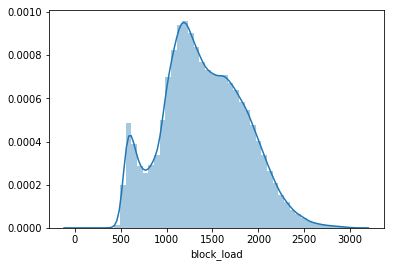

In [16]:
sns.distplot(df2['block_load'])

----->   Our target Variable is Not normaly distributed

In [17]:
print ("The skewness of block_load is {}".format(df2['block_load'].skew()))

The skewness of block_load is 0.17820827750554522


In [18]:
import pandas_profiling as pp

C:\Users\GURU\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\GURU\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\GURU\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\GURU\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\GURU\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\GURU\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\GURU\Anac

In [19]:
pp.ProfileReport(df_r)

Number of variables,21
Number of observations,69556
Total Missing (%),5.7%
Total size in memory,11.1 MiB
Average record size in memory,168.0 B
Numeric,10
Categorical,8
Boolean,0
Date,0
Text (Unique),2
Rejected,1


------> Variable temperature is highly correlated  with apparent_temperature.lets delete one of them.

In [20]:
#df_r.drop(['apparent_temperature'],axis = 1, inplace= True)

In [29]:
df_r.head()


,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,pressure,...,visibility,sunrise,sunset,icon,summary,updated_at,date,time_slot,block,block_load
0,2010-12-31 18:30:00,2011-01-01 00:00:00,0.30,8.44,9.68,0.95,8.95,230.0,2.51,1015.31,...,0.82,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:00-00:15,1,945.592
1,2010-12-31 19:30:00,2011-01-01 01:00:00,0.31,7.71,8.89,1.00,8.89,240.0,2.24,NaN,...,0.48,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:15-00:30,2,928.644
2,2010-12-31 20:30:00,2011-01-01 02:00:00,0.31,7.71,8.89,1.00,8.89,250.0,2.24,NaN,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:30-00:45,3,912.076
3,2010-12-31 21:30:00,2011-01-01 03:00:00,0.10,7.76,8.90,0.95,8.20,273.0,2.18,1015.19,...,0.45,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:45-01:00,4,895.105
4,2010-12-31 22:30:00,2011-01-01 04:00:00,0.31,8.44,10.00,1.00,10.00,270.0,3.13,NaN,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,01:00-01:15,5,879.988


In [22]:
#df2.groupby('date').block_load.hist(alpha=0.6)

In [23]:
#df2.plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('block_load', fontsize=20);

----------> Load is increasing year by year

In [24]:
#df2[['block_load']].plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('date', fontsize=20);

In [25]:
#df2.block_load.plot(title='# Load graph')
#plt.show()

-------> We can clearly Notice that Year by year there is increase in Block_Load.

In [30]:
df_r.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,pressure,...,visibility,sunrise,sunset,icon,summary,updated_at,date,time_slot,block,block_load
0,2010-12-31 18:30:00,2011-01-01 00:00:00,0.30,8.44,9.68,0.95,8.95,230.0,2.51,1015.31,...,0.82,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:00-00:15,1,945.592
1,2010-12-31 19:30:00,2011-01-01 01:00:00,0.31,7.71,8.89,1.00,8.89,240.0,2.24,NaN,...,0.48,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:15-00:30,2,928.644
2,2010-12-31 20:30:00,2011-01-01 02:00:00,0.31,7.71,8.89,1.00,8.89,250.0,2.24,NaN,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:30-00:45,3,912.076
3,2010-12-31 21:30:00,2011-01-01 03:00:00,0.10,7.76,8.90,0.95,8.20,273.0,2.18,1015.19,...,0.45,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:45-01:00,4,895.105
4,2010-12-31 22:30:00,2011-01-01 04:00:00,0.31,8.44,10.00,1.00,10.00,270.0,3.13,NaN,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,01:00-01:15,5,879.988


In [34]:
#df1 = df[['b', 'c']]
#df.iloc[:,[1,3]]
df_temp = df_r.iloc[:,[4,5,20]]

In [35]:
df_temp.head()


,temperature,humidity,block_load
0,9.68,0.95,945.592
1,8.89,1.00,928.644
2,8.89,1.00,912.076
3,8.90,0.95,895.105
4,10.00,1.00,879.988


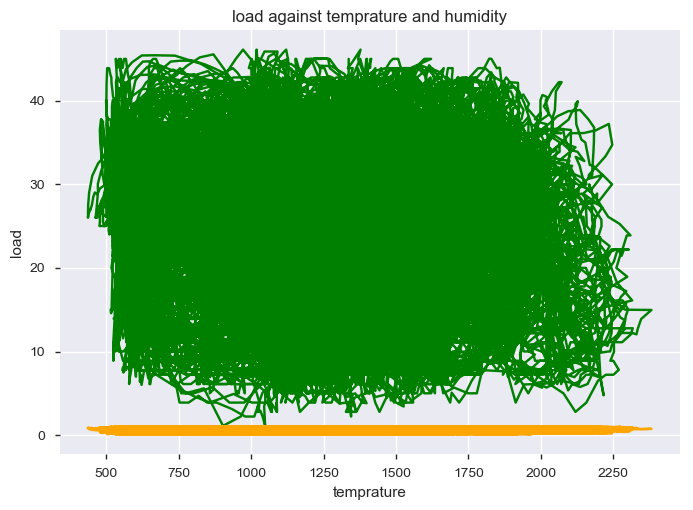

In [36]:
plt.plot(df_r['block_load'],df_r['temperature'], color='g')
plt.plot(df_r['block_load'], df_r['humidity'], color='orange')
plt.xlabel('temprature')
plt.ylabel('load')
plt.title('load against temprature and humidity')
plt.show()

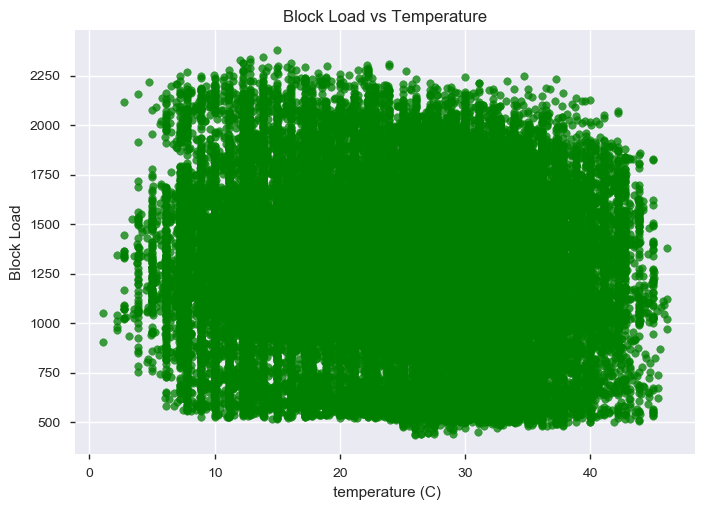

In [37]:
# Define a function to create the scatterplot. This makes it easy to
# reuse code within and across notebooks
def scatterplot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = 'green', alpha = 0.75)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Call the function to create plot
scatterplot(x_data = df_r['temperature']
            , y_data = df_r['block_load']
            , x_label = ' temperature (C)'
            , y_label = 'Block Load'
            , title = 'Block Load vs Temperature')

--->No Clear Insight from scatter plot 

------> Lets try to get best fit line through with OLS.

C:\Users\GURU\Anaconda3\lib\site-packages\statsmodels\base\data.py:131: RuntimeWarning: invalid value encountered in reduce
  const_idx = np.where(self.exog.ptp(axis=0) == 0)[0].squeeze()
C:\Users\GURU\Anaconda3\lib\site-packages\statsmodels\tools\tools.py:346: RuntimeWarning: invalid value encountered in reduce
  cutoff = rcond * np.maximum.reduce(s)
C:\Users\GURU\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\GURU\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
C:\Users\GURU\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\GURU\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
 

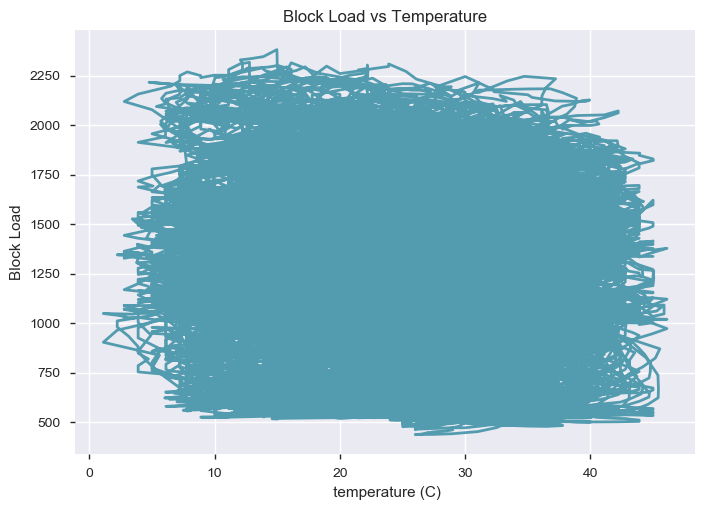

In [38]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(df_r['temperature'])
y =  df_r['block_load']
regr = sm.OLS(y, x)
res = regr.fit()
# Get fitted values from model to plot
st, data, ss2 = summary_table(res, alpha=0.05)
fitted_values = data[:,1]

# Define a function for the line plot
def lineplot(x_data, y_data, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Call the function to create plot
lineplot(x_data = df_r['temperature']
            , y_data = fitted_values
            , x_label = ' temperature (C)'
            , y_label = 'Block Load'
            , title = 'Block Load vs Temperature')

Not clear insight from this as well

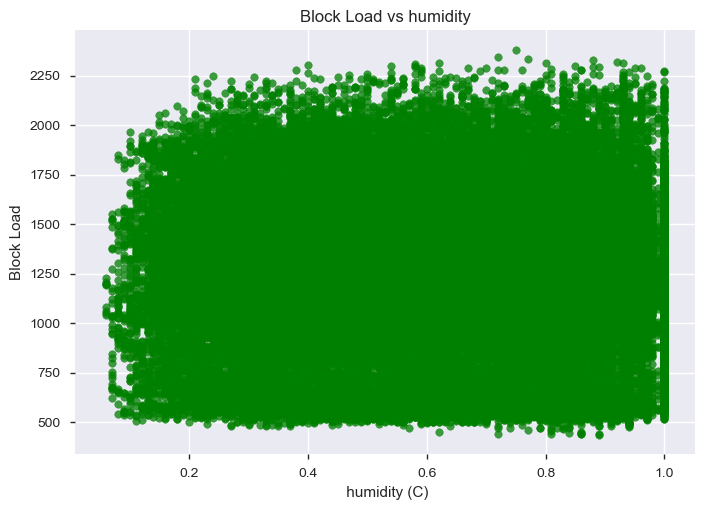

In [39]:
scatterplot(x_data = df_r['humidity']
            , y_data = df_r['block_load']
            , x_label = ' humidity (C)'
            , y_label = 'Block Load'
            , title = 'Block Load vs humidity')

---------> Increasing the humudity increasing the load

-------------> Lets have a look with "apparent_temperature" as well.

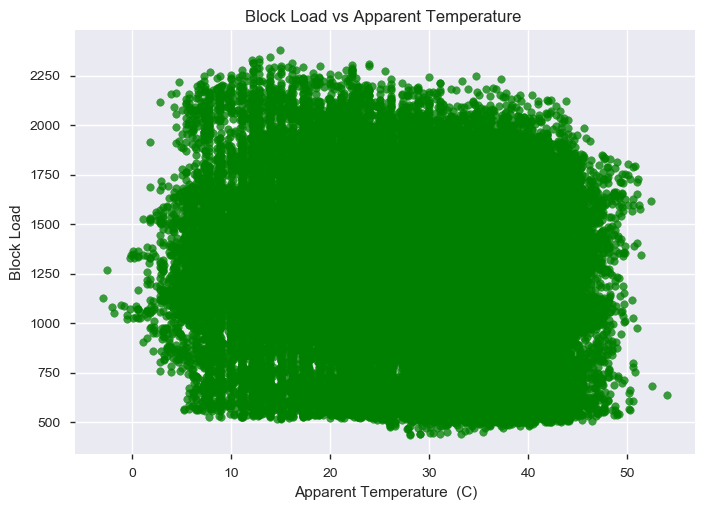

In [40]:
scatterplot(x_data = df_r['apparent_temperature']
            , y_data = df_r['block_load']
            , x_label = 'Apparent Temperature  (C)'
            , y_label = 'Block Load'
            , title = 'Block Load vs Apparent Temperature ')

-------> Highest load generating is between 10 to 30 degree .

In [41]:
df_r.head()

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,pressure,...,visibility,sunrise,sunset,icon,summary,updated_at,date,time_slot,block,block_load
0,2010-12-31 18:30:00,2011-01-01 00:00:00,0.30,8.44,9.68,0.95,8.95,230.0,2.51,1015.31,...,0.82,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:00-00:15,1,945.592
1,2010-12-31 19:30:00,2011-01-01 01:00:00,0.31,7.71,8.89,1.00,8.89,240.0,2.24,NaN,...,0.48,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:15-00:30,2,928.644
2,2010-12-31 20:30:00,2011-01-01 02:00:00,0.31,7.71,8.89,1.00,8.89,250.0,2.24,NaN,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:30-00:45,3,912.076
3,2010-12-31 21:30:00,2011-01-01 03:00:00,0.10,7.76,8.90,0.95,8.20,273.0,2.18,1015.19,...,0.45,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,00:45-01:00,4,895.105
4,2010-12-31 22:30:00,2011-01-01 04:00:00,0.31,8.44,10.00,1.00,10.00,270.0,3.13,NaN,...,0.32,2011-01-01 01:44:45,2011-01-01 12:06:15,fog,Foggy,2018-04-11 11:33:39,2011-04-01,01:00-01:15,5,879.988


In [42]:
#Saparating categorical and numric variables
numric_data = df_r.select_dtypes(include =[np.number])
cat_data = df_r.select_dtypes(exclude =[np.number])

In [43]:
numric_data.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,pressure,visibility,block,block_load
0,0.30,8.44,9.68,0.95,8.95,230.0,2.51,1015.31,0.82,1,945.592
1,0.31,7.71,8.89,1.00,8.89,240.0,2.24,NaN,0.48,2,928.644
2,0.31,7.71,8.89,1.00,8.89,250.0,2.24,NaN,0.32,3,912.076
3,0.10,7.76,8.90,0.95,8.20,273.0,2.18,1015.19,0.45,4,895.105
4,0.31,8.44,10.00,1.00,10.00,270.0,3.13,NaN,0.32,5,879.988


--------> Variable pressure containing alot of NaN values and seems not as important variables , Lets drop It.

In [44]:
numric_data.drop(['pressure'],axis = 1, inplace = True)


C:\Users\GURU\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
numric_data.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,visibility,block,block_load
0,0.30,8.44,9.68,0.95,8.95,230.0,2.51,0.82,1,945.592
1,0.31,7.71,8.89,1.00,8.89,240.0,2.24,0.48,2,928.644
2,0.31,7.71,8.89,1.00,8.89,250.0,2.24,0.32,3,912.076
3,0.10,7.76,8.90,0.95,8.20,273.0,2.18,0.45,4,895.105
4,0.31,8.44,10.00,1.00,10.00,270.0,3.13,0.32,5,879.988


In [46]:
numric_data.isnull().sum()

cloud_cover             16674
apparent_temperature      280
temperature               280
humidity                  289
dew_point                 289
wind_bearing            10726
wind_speed               8524
visibility                181
block                       0
block_load                  0
dtype: int64

-------->All Variable Containing NaN values lets replace them with Zeros.


In [47]:
numric_data.fillna(0,inplace=True)

C:\Users\GURU\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [48]:
numric_data.isnull().sum()

cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
visibility              0
block                   0
block_load              0
dtype: int64

In [63]:
cat_data.summary.unique()

array(['Foggy', 'Mostly Cloudy', 'Clear', 'Partly Cloudy', 'Breezy',
       'Breezy and Foggy', 'Breezy and Partly Cloudy', 'Overcast',
       'Humid and Foggy', 'Humid and Overcast', 'Breezy and Humid',
       'Breezy and Mostly Cloudy', 'Humid and Partly Cloudy', 'Humid',
       'Humid and Mostly Cloudy', 'Dangerously Windy and Humid',
       'Windy and Foggy', 'Windy and Humid',
       'Dangerously Windy and Foggy', 'Windy', 'Possible Light Rain',
       'Rain', 'Light Rain'], dtype=object)

In [50]:
X= numric_data.iloc[ : , :-1].values
y= numric_data.iloc[ : , 9].values

-----> Lets find the Most significant variables numric and categorical based on F1 score.

In [53]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)

SelectPercentile(percentile=25,
         score_func=<function f_regression at 0x0000021440382598>)

In [54]:
#from sklearn.datasets import load_boston
for n,s in zip(numric_data,Selector_f.scores_):
 print ('F-score: %3.2f for feature %s'  % (s,n))

F-score: 15.19 for feature cloud_cover
F-score: 242.83 for feature apparent_temperature
F-score: 185.34 for feature temperature
F-score: 0.04 for feature humidity
F-score: 201.88 for feature dew_point
F-score: 4.88 for feature wind_bearing
F-score: 11.09 for feature wind_speed
F-score: 1078.24 for feature visibility
F-score: 6401.34 for feature block


----------> Based on F1 Score most important variables are(Ascending Order):--block,visibility,apparent_temperature,dew_point,temperature

Lets explore visibility and Dew_point as well

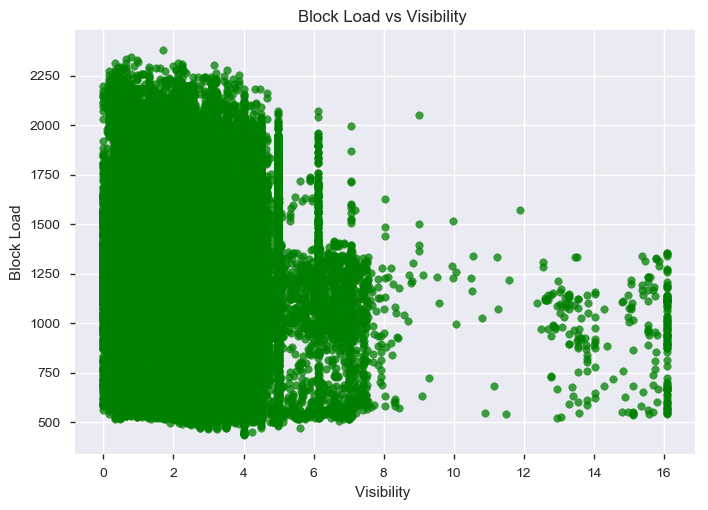

In [55]:
scatterplot(x_data = df_r['visibility']
            , y_data = df_r['block_load']
            , x_label = 'Visibility '
            , y_label = 'Block Load'
            , title = 'Block Load vs Visibility ')

-------> We can clearly notice that low visibility means increase in load,very high load in visibility inbetween 0 to 7 .

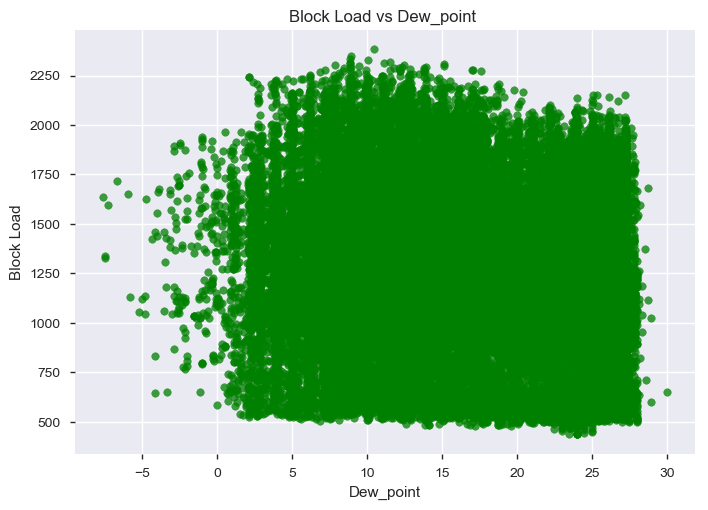

In [56]:
scatterplot(x_data = df_r['dew_point']
            , y_data = df_r['block_load']
            , x_label = 'Dew_point'
            , y_label = 'Block Load'
            , title = 'Block Load vs Dew_point ')

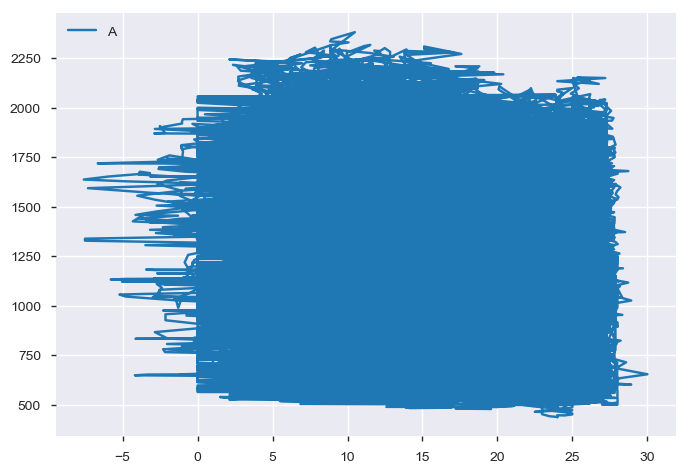

In [57]:
plt.plot(numric_data['dew_point'], numric_data['block_load'])
plt.legend('ABC', ncol=2, loc='upper left');

------> very High load when dew point is inbetween 3 to 20 from both scatter plot and line.